In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from datetime import datetime
import json 
from pandas.io.json import json_normalize
from scipy import stats
import statsmodels.api as sm  ## OLS

In [69]:
### load in data

week_dates = pd.read_csv('605 Junior Business Analyst Project/week_dates_data.csv')
survey_data = pd.read_csv('605 Junior Business Analyst Project/post_survey_data.csv')
sales_data = pd.read_csv('605 Junior Business Analyst Project/retail_store_x_sales_data.csv')
demogr_data = pd.read_csv('605 Junior Business Analyst Project/demographics_data.csv')
addressable_ad = pd.read_csv('605 Junior Business Analyst Project/addressable_ad_assignment_data.csv')

In [34]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # count of missing vals
        mis_val_count = df.isnull().sum()
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_count], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values',2:'# Missing'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

## check tables for missing data
missing_values_table(sales_data)


Your selected dataframe has 3 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,# Missing


In [35]:
### only one table has missing values -- the demographic table

## there are 44 missing values in the age binned column
missing_values_table(demogr_data)

### after inspection I have decided to impute with the mode


Your selected dataframe has 3 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values,# Missing
age_binned,44,2.9,44


In [8]:
## did ad affect consumers favorability?

q1 = pd.merge(survey_data, addressable_ad, how ='left', on='person_id')


,person_id,Favorability,addressable_assignment,addressable_ad_frequency
0,1,Favorable,1,LOW VOLUME
1,2,Unfavorable,1,HIGH VOLUME
2,6,Unfavorable,0,NONE
3,8,Unfavorable,1,HIGH VOLUME
4,11,Unfavorable,0,NONE
5,13,Unfavorable,1,HIGH VOLUME
6,15,Unfavorable,1,LOW VOLUME
7,16,Favorable,1,LOW VOLUME
8,17,Favorable,0,NONE
9,21,Unfavorable,1,LOW VOLUME


In [ ]:
### create a new column where 1 represents favorable 0 represents non favorable

In [18]:
q1['Favorable_y_n'] = (q1['Favorability'] == 'Favorable')

In [20]:
q1['Favorable_y_n'] = q1['Favorable_y_n'].astype(int)

In [25]:
###  find data about each type of ad frequency 

high_low_none = q1.pivot_table('Favorable_y_n', index = ['addressable_ad_frequency'])


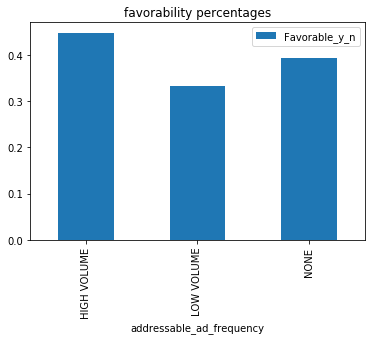

In [27]:
high_low_none.plot.bar(title = 'favorability percentages')

In [28]:
q1[['addressable_ad_frequency','Favorable_y_n']].groupby(['addressable_ad_frequency']).describe()

Favorable_y_n                                     \
                                 count      mean       std  min  25%  50%   
addressable_ad_frequency                                                    
HIGH VOLUME                      125.0  0.448000  0.499290  0.0  0.0  0.0   
LOW VOLUME                       177.0  0.333333  0.472742  0.0  0.0  0.0   
NONE                             298.0  0.392617  0.489154  0.0  0.0  0.0   

                                    
                          75%  max  
addressable_ad_frequency            
HIGH VOLUME               1.0  1.0  
LOW VOLUME                1.0  1.0  
NONE                      1.0  1.0

In [ ]:
### did the ad impact sales



In [33]:
## start by comibing sales data, addressable ad data, and make use weeks column properly

q2 = pd.merge(week_dates, sales_data, how ='inner', on= 'week_num')

## this will show that there are no missing vals
q2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145420 entries, 0 to 145419
Data columns (total 4 columns):
week_num           145420 non-null int64
week_start_date    145420 non-null object
person_id          145420 non-null int64
sales              145420 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 5.5+ MB


In [41]:
## change week start date to datetime
q2['week_start_date'] = pd.to_datetime(q2['week_start_date'])

In [45]:
q2_pivot = q2.pivot_table('sales', index= 'week_start_date', aggfunc = sum)



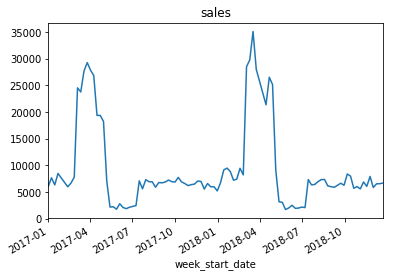

In [47]:
### graph of sales over tme

q2_pivot['sales'].plot(title = 'sales')

In [ ]:
### which audiences were affected by the ad

In [77]:
# impute missing vals for demographics

# had to go into excel and change format of age_binned from general to text

demogr_data['age_binned'].fillna(demogr_data['age_binned'].mode())


0       50 - 64
1       18 - 24
2       18 - 24
3       18 - 24
4           65+
5       50 - 64
6       50 - 64
7       25 - 49
8       18 - 24
9       18 - 24
10      25 - 49
11          65+
12      25 - 49
13      18 - 24
14      25 - 49
15      50 - 64
16      25 - 49
17          NaN
18      18 - 24
19      18 - 24
20      18 - 24
21      25 - 49
22      18 - 24
23      18 - 24
24      50 - 64
25      50 - 64
26      25 - 49
27      50 - 64
28      18 - 24
29          NaN
         ...   
1470    25 - 49
1471    50 - 64
1472    25 - 49
1473    50 - 64
1474    25 - 49
1475    18 - 24
1476    18 - 24
1477    25 - 49
1478        65+
1479    50 - 64
1480    50 - 64
1481    18 - 24
1482    18 - 24
1483    18 - 24
1484    25 - 49
1485        65+
1486    50 - 64
1487        65+
1488    18 - 24
1489    50 - 64
1490    25 - 49
1491    25 - 49
1492        65+
1493        65+
1494    50 - 64
1495    18 - 24
1496    18 - 24
1497    25 - 49
1498    50 - 64
1499    18 - 24
Name: age_binned, Length

In [84]:
q2

,week_num,week_start_date,person_id,sales
0,1,2017-01-01,1,9.734515
1,1,2017-01-01,2,1.003192
2,1,2017-01-01,3,2.361131
3,1,2017-01-01,4,4.615370
4,1,2017-01-01,5,5.998281
5,1,2017-01-01,6,3.002160
6,1,2017-01-01,7,0.191822
7,1,2017-01-01,8,0.940594
8,1,2017-01-01,9,1.750618
9,1,2017-01-01,10,7.120934


In [81]:
demogr_data = demogr_data.dropna()

In [82]:
demogr_data.isna().sum()

person_id     0
gender        0
age_binned    0
dtype: int64

In [83]:
demogr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1499
Data columns (total 3 columns):
person_id     1457 non-null int64
gender        1457 non-null object
age_binned    1457 non-null object
dtypes: int64(1), object(2)
memory usage: 45.5+ KB


In [ ]:
### ended up dropping NAs -- tried to impute the mode using (replace, fillna, map with dict)

In [85]:
q3 = pd.merge(demogr_data, q2, how = 'inner', on='person_id')

In [88]:
q3part2 = pd.merge(q3, addressable_ad, how = 'inner', on= 'person_id')

In [93]:
q3part3 = pd.merge(q3part2, q1, how = 'inner', on = 'person_id')

In [152]:
### could have done nested merge just wanted to make sure it went smoothly checking NAs at each merge
# q3part3

In [112]:
q3_pivot = q3part3.pivot_table('sales', index = ['gender','age_binned'],columns = 'week_start_date', aggfunc = sum)
q3_pivot

week_start_date    2017-01-01  2017-01-08  2017-01-15  2017-01-22  2017-02-12  \
gender age_binned                                                               
F      18 - 24     258.922023  464.481519  214.841851  249.915964  191.697328   
       25 - 49     205.636662  197.936453  984.077776  395.483220  220.581524   
       50 - 64     298.968705  304.862971  194.558168  324.548641  306.211632   
       65+          89.500551   97.413933  124.104358   85.636099  143.813499   
M      18 - 24     514.685226  478.736822  263.546045  412.039757  290.731107   
       25 - 49     267.120861  497.898955  272.315731  332.586960  280.079762   
       50 - 64     401.894297  208.144679  220.263562  525.121482  557.550312   
       65+         281.541117  439.313995  197.575391  424.713361  178.856714   

week_start_date    2017-02-19  2017-02-26   2017-03-05   2017-03-12  \
gender age_binned                                                     
F      18 - 24     234.224076  490.034473  1199.783067   812.346707   
       25 - 49     182.977030  257.417246   973.646137   764.206015   
       50 - 64     200.514381  242.002134   846.834989   677.688270   
       65+         181.130719   93.157734   468.244447   384.060791   
M      18 - 24     822.857668  587.682523  1665.289545  1946.474813   
       25 - 49     320.602901  309.320892  1520.566520  1938.710056   
       50 - 64     199.480621  354.607683  1915.255483  1442.775380   
       65+         263.380790  256.109680   750.241845   828.384136   

week_start_date     2017-03-19  ...  2018-10-21  2018-10-28  2018-11-04  \
gender age_binned               ...                                       
F      18 - 24     1245.804228  ...  317.572436  575.991859  183.192985   
       25 - 49     1845.146888  ...  233.737530  199.823967  184.176576   
       50 - 64     1091.006504  ...  165.142605  213.453920  226.241264   
       65+          488.687019  ...   68.002899   91.400341   75.035494   
M      18 - 24     1665.972062  ...  213.291650  339.089855  323.837306   
       25 - 49     1923.438774  ...  352.488867  222.842642  249.167164   
       50 - 64     1720.807891  ...  237.846654  451.428245  236.630822   
       65+         1495.606517  ...  157.592461  286.932266  196.311902   

week_start_date     2018-11-11  2018-11-18  2018-11-25  2018-12-02  \
gender age_binned                                                    
F      18 - 24      233.350215  221.584631  158.928892  225.857912   
       25 - 49      206.168738  420.678587  364.338334  175.521555   
       50 - 64      215.142232  491.950953  646.973002  222.975721   
       65+           99.170308   96.940815   89.348382   58.305656   
M      18 - 24     1072.089913  394.631123  573.502578  869.741275   
       25 - 49      715.114829  737.107997  526.141375  338.165868   
       50 - 64      724.199094  314.247058  343.302327  261.822577   
       65+          155.855447  260.401787  170.840385  456.817960   

week_start_date    2018-12-09  2018-12-16  2018-12-23  
gender age_binned                                      
F      18 - 24     326.498145  180.353643  279.929062  
       25 - 49     589.525923  320.598713  246.189952  
       50 - 64     144.714173  176.973361  342.119895  
       65+         207.689877  185.044362  175.565266  
M      18 - 24     281.890400  273.648375  314.364869  
       25 - 49     499.964488  352.921633  613.834577  
       50 - 64     952.968632  476.587149  284.741146  
       65+         212.383627  436.835796  336.664395  

[8 rows x 98 columns]

In [121]:
q3_pivot2 = q3part3.pivot_table('sales', index = ['gender'], aggfunc = sum)


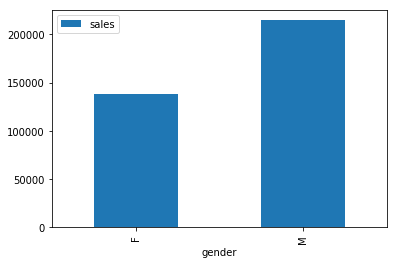

In [131]:
q3part3.pivot_table('sales', index = ['gender'], aggfunc = sum).plot.bar()

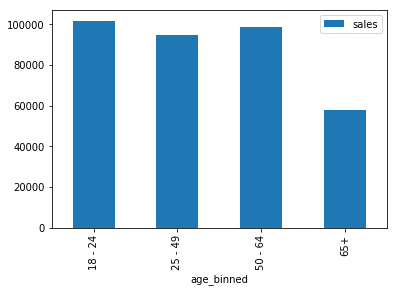

In [133]:
q3part3.pivot_table('sales', index = 'age_binned', aggfunc = sum).plot.bar()

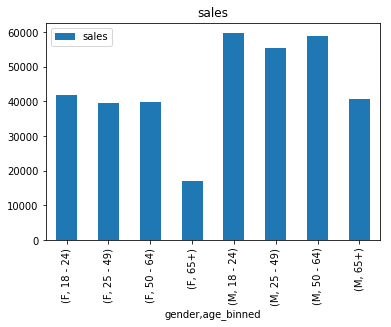

In [140]:
q3part3.pivot_table('sales', index = ['gender','age_binned'], aggfunc = sum).plot.bar(title = 'sales')

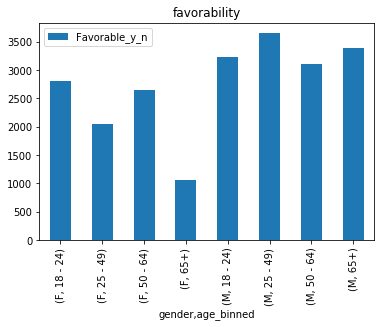

In [138]:
q3part3.pivot_table('Favorable_y_n', index = ['gender','age_binned'], aggfunc = sum).plot.bar(title ='favorability')

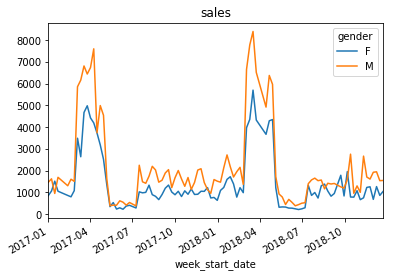

In [146]:
q3part3.pivot_table('sales', index = ['week_start_date'],columns = 'gender', aggfunc = sum).plot(title ='sales')

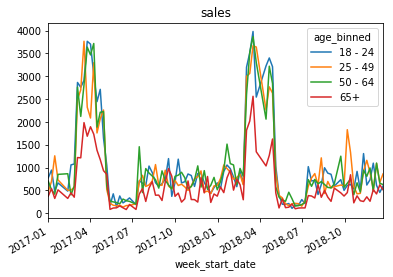

In [147]:
q3part3.pivot_table('sales', index = ['week_start_date'],columns = 'age_binned', aggfunc = sum).plot(title ='sales')

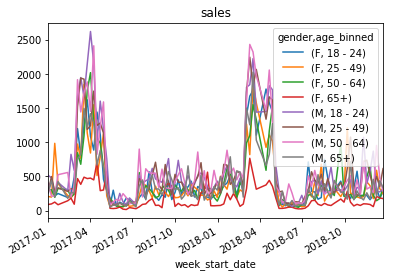

In [148]:
q3part3.pivot_table('sales', index = ['week_start_date'],columns = ['gender','age_binned'], aggfunc = sum).plot(title ='sales')

In [151]:
# q3part3.pivot_table('Favorable_y_n', index = ['week_start_date'],columns = ['gender','age_binned'], aggfunc = sum).plot(title ='sales')